In [52]:
# 引入包
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from keras.layers.embeddings import Embedding
from keras.layers import Flatten, LayerNormalization, Concatenate, Dropout, Dense
from tensorflow.keras.metrics import  Precision, Recall
import tensorflow as tf 
import keras

In [53]:
# 载入数据集
raw_dataset = pd.read_json("../dataset/pre_process/dataset_laji.json", orient="index")
raw_dataset

,sn,fault_time,label,time,all_tokens,server_model
0,SERVER_10001,2020-05-01 10:04:00,1,"[[9, 5], [9, 0], [9, 0], [8, 59], [8, 59], [8,...","[45083, 45325, 45085, 0, 1, 2, 3, 2, 274, 278,...",51
1,SERVER_10003,2020-03-28 09:48:00,2,"[[9, 48], [9, 48], [9, 48], [9, 48], [9, 48], ...","[45465, 45104, 45085, 45280, 420, 39, 40, 4508...",51
2,SERVER_10008,2020-02-25 16:12:00,1,"[[16, 47], [16, 46], [16, 46], [1, 52], [15, 5...","[45086, 45118, 45085, 45287, 7, 45118, 45085, ...",20
3,SERVER_10008,2020-03-11 18:04:00,2,"[[16, 47], [16, 46], [16, 46], [1, 52], [15, 5...","[45086, 45118, 45085, 45287, 7, 45118, 45085, ...",20
4,SERVER_10009,2020-05-08 16:37:00,3,"[[16, 7], [16, 7], [16, 7], [16, 7], [25, 61],...","[45938, 45172, 45090, 51, 52, 69, 70, 758, 51,...",20
...,...,...,...,...,...,...
16664,SERVER_9991,2020-08-04 22:49:00,2,"[[18, 14], [22, 46], [19, 52], [25, 61], [25, ...","[45335, 45104, 45085, 45280, 292, 39, 40, 4508...",33
16665,SERVER_9991,2020-10-07 18:42:00,2,"[[18, 14], [22, 46], [19, 52], [25, 61], [25, ...","[45335, 45104, 45085, 45280, 292, 39, 40, 4508...",33
16666,SERVER_9993,2020-05-14 23:50:00,2,"[[23, 48], [23, 43], [25, 61], [25, 61], [25, ...","[45459, 45104, 45085, 45280, 414, 39, 40, 4508...",51
16667,SERVER_9998,2020-05-29 11:25:00,2,"[[11, 19], [11, 4], [25, 61], [25, 61], [25, 6...","[45477, 45104, 45085, 45280, 430, 39, 40, 4508...",51


In [54]:
raw_dataset = raw_dataset.sample(frac = 1.0)
raw_dataset_sample = raw_dataset[:4000].copy()
raw_dataset = raw_dataset[4000:].copy()

In [55]:
label_0_df  = raw_dataset[raw_dataset["label"] == 0]
for i in range(7):
    raw_dataset = raw_dataset.append(label_0_df)
raw_dataset

,sn,fault_time,label,time,all_tokens,server_model
9868,SERVER_24375,2020-02-11 00:38:00,2,"[[0, 28], [0, 28], [0, 28], [0, 28], [0, 28], ...","[45566, 45104, 45085, 45280, 511, 39, 40, 4508...",76
8359,SERVER_22167,2020-10-21 14:01:00,1,"[[12, 43], [12, 43], [25, 61], [25, 61], [25, ...","[46080, 45214, 45085, 48565, 815, 816, 45214, ...",45
9576,SERVER_23911,2020-05-15 10:55:00,2,"[[10, 54], [10, 53], [10, 53], [10, 53], [10, ...","[46659, 45104, 45085, 45280, 1294, 39, 40, 450...",28
5662,SERVER_18105,2020-05-02 18:42:00,1,"[[16, 54], [16, 41], [16, 25], [14, 44], [14, ...","[45086, 45118, 45085, 45287, 7, 45118, 45085, ...",83
8723,SERVER_2278,2020-06-24 00:46:00,2,"[[9, 16], [9, 15], [9, 13], [9, 13], [0, 43], ...","[45411, 45334, 45085, 221, 1, 3, 286, 287, 288...",44
...,...,...,...,...,...,...
11658,SERVER_27415,2020-07-25 13:25:00,0,"[[12, 23], [12, 23], [12, 22], [12, 22], [12, ...","[45822, 45207, 45090, 142, 143, 144, 658, 146,...",23
10705,SERVER_25735,2020-08-13 16:17:00,0,"[[15, 12], [15, 12], [15, 11], [15, 10], [15, ...","[45333, 45334, 45085, 221, 1, 285, 286, 287, 2...",2
13008,SERVER_4758,2020-04-25 15:50:00,0,"[[15, 49], [15, 49], [15, 48], [15, 48], [15, ...","[45455, 45104, 45090, 45280, 410, 39, 40, 4509...",79
6401,SERVER_19276,2020-03-02 10:23:00,0,"[[23, 1], [9, 41], [9, 41], [9, 41], [9, 41], ...","[45310, 45177, 45085, 45280, 267, 8, 40, 45085...",16


In [56]:
label_0_df  = raw_dataset[raw_dataset["label"] == 1]
for i in range(4):
    raw_dataset = raw_dataset.append(label_0_df)
raw_dataset

,sn,fault_time,label,time,all_tokens,server_model
9868,SERVER_24375,2020-02-11 00:38:00,2,"[[0, 28], [0, 28], [0, 28], [0, 28], [0, 28], ...","[45566, 45104, 45085, 45280, 511, 39, 40, 4508...",76
8359,SERVER_22167,2020-10-21 14:01:00,1,"[[12, 43], [12, 43], [25, 61], [25, 61], [25, ...","[46080, 45214, 45085, 48565, 815, 816, 45214, ...",45
9576,SERVER_23911,2020-05-15 10:55:00,2,"[[10, 54], [10, 53], [10, 53], [10, 53], [10, ...","[46659, 45104, 45085, 45280, 1294, 39, 40, 450...",28
5662,SERVER_18105,2020-05-02 18:42:00,1,"[[16, 54], [16, 41], [16, 25], [14, 44], [14, ...","[45086, 45118, 45085, 45287, 7, 45118, 45085, ...",83
8723,SERVER_2278,2020-06-24 00:46:00,2,"[[9, 16], [9, 15], [9, 13], [9, 13], [0, 43], ...","[45411, 45334, 45085, 221, 1, 3, 286, 287, 288...",44
...,...,...,...,...,...,...
10546,SERVER_25474,2020-10-19 02:04:00,1,"[[0, 37], [0, 37], [25, 61], [25, 61], [25, 61...","[46073, 45214, 45085, 48565, 815, 817, 45214, ...",40
8592,SERVER_22561,2020-04-22 15:06:00,1,"[[15, 2], [15, 2], [15, 2], [15, 2], [15, 2], ...","[45315, 45101, 45085, 0, 31, 32, 4, 272, 34, 3...",42
2058,SERVER_12890,2020-04-22 10:35:00,1,"[[9, 35], [9, 34], [25, 61], [25, 61], [25, 61...","[45318, 45084, 45085, 45287, 277, 4, 45085, 45...",6
10162,SERVER_24858,2020-03-18 15:10:00,1,"[[10, 0], [10, 0], [10, 0], [9, 54], [9, 54], ...","[45083, 45325, 45085, 0, 1, 2, 3, 2, 274, 278,...",0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(raw_dataset[["time", "all_tokens", "server_model"]], raw_dataset["label"], test_size = 0.01)
y_train_ = np.float64(tf.keras.utils.to_categorical(y_train, num_classes=4))
y_test_ = np.float64(tf.keras.utils.to_categorical(y_test, num_classes=4))
X_train_tokens = np.array([[x for x in x1] for x1 in  X_train.values[:, 1]])
X_test_tokens = np.array([[x for x in x1] for x1 in X_test.values[:, 1]])
X_train_times = np.array([[x for x in x1] for x1 in  X_train.values[:, 0]])
X_test_times = np.array([[x for x in x1] for x1 in X_test.values[:, 0]])
X_train_model = X_train.values[:, 2]
X_test_model = X_test.values[:, 2]

In [58]:
# token_time_X_train = np.c_[X_train_tokens, X_train_times]
# token_time_X_test = np.c_[X_test_tokens, X_test_times]

In [59]:
# rf = RandomForestClassifier(oob_score=True)
# rf.fit(X_train_tokens, y_train)
# score = rf.score(X_test_tokens, y_test)
# print(score)
# y_pred = rf.predict(X_test_tokens)
# print(classification_report(y_test, y_pred))

In [60]:
def build_models(drop_rate):
    time_hour_input = tf.keras.Input(shape=(35, ), name= "time_hour_input")
    time_min_input = tf.keras.Input(shape=(35, ), name= "time_min_input")
    # time_sec_input = tf.keras.Input(shape=(35, ), name= "time_sec_input")
    token_input = tf.keras.Input(shape=(321, ), name= "token_input")
    server_input = tf.keras.Input(shape=(1, ), name= "server_input")

    time_hour_output = Embedding(input_dim=26, output_dim=5, input_length = 35)(time_hour_input)
    time_min_output = Embedding(input_dim=62, output_dim=5, input_length = 35)(time_min_input)
    # time_sec_output = Embedding(input_dim=62, output_dim=5, input_length = 35)(time_sec_input)
    token_output = Embedding(input_dim=91800, output_dim=50, input_length = 321)(token_input)
    server_output = Embedding(input_dim=89, output_dim=5, input_length = 1)(server_input)

    time_hour_output = LayerNormalization()(time_hour_output)
    time_min_output = LayerNormalization()(time_min_output)
    # time_sec_output = LayerNormalization()(time_sec_output)
    token_output = LayerNormalization()(token_output)
    server_output = LayerNormalization()(server_output)

    time_hour_output = Flatten()(time_hour_output)
    time_min_output = Flatten()(time_min_output)
    # time_sec_output = Flatten()(time_sec_output)
    token_output = Flatten()(token_output)
    server_output = Flatten()(server_output)

    time_hour_output = Dropout(drop_rate)(time_hour_output)
    time_min_output = Dropout(drop_rate)(time_min_output)
    # time_sec_output = Dropout(drop_rate)(time_sec_output)
    token_output = Dropout(drop_rate)(token_output)
    server_output = Dropout(drop_rate)(server_output)

    output = Concatenate(axis = -1)([token_output, server_output, time_hour_output, time_min_output])
    output = Dense(4, activation='softmax')(output)
    model = tf.keras.Model(inputs = [time_hour_input, time_min_input, token_input, server_input], outputs = output)
    
    model.compile(
            loss=tf.keras.losses.categorical_crossentropy,
            optimizer="adam",
            metrics=["acc", Precision(), Recall()],
            loss_weights = [3, 2, 1, 1]
        )
    return model


In [61]:
class_weights = {0:3/7, 1:2/7, 2:1/7, 3:1/7}

In [62]:
y_train.values.shape

(30619,)

In [63]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)
model = build_models(0.5)
model.fit(x= (X_train_times[:, :, 0].astype("float64"), X_train_times[:, :, 1].astype("float64"), X_train_tokens.astype("float64"), X_train_model.astype("float64")),
     y=y_train_, epochs=50,  batch_size=128, verbose=1, validation_split = 0.2,callbacks = [callback])
# score1 = model.evaluate(X_test, y_test)
# score1
score1 = model.evaluate(x= (X_test_times[:, :, 0].astype("float64"), X_test_times[:, :, 1].astype("float64"), X_test_tokens.astype("float64"), X_test_model.astype("float64")),
     y=y_test_) 
print(score1)
result = model.predict(x= (X_test_times[:, :, 0].astype("float64"), X_test_times[:, :, 1].astype("float64"), X_test_tokens.astype("float64"), X_test_model.astype("float64")), verbose=1)
result_int = [int(np.where(x== max(x))[0]) for x in result]
result_int_ = np.float64(tf.keras.utils.to_categorical(result_int, num_classes=4))
report = classification_report(y_test_, result_int_)
print(report)
result_f1 = [float(x.split("      ")[4]) for x in report.split("\n")[2:6]]
weight_f1 = [3, 2, 1, 1]
total_f1 = zip(result_f1, weight_f1)
sum = 0
for e in total_f1:
    sum += e[0] * e[1]
marco_f1_weight = sum / 7
marco_f1_weight

Epoch 1/50
192/192 [==============================] - 5s 19ms/step - loss: 2.9982 - acc: 0.6420 - precision_4: 0.6735 - recall_4: 0.5876 - val_loss: 1.7635 - val_acc: 0.7743 - val_precision_4: 0.8088 - val_recall_4: 0.7178
Epoch 2/50
192/192 [==============================] - 3s 17ms/step - loss: 1.7330 - acc: 0.7758 - precision_4: 0.8052 - recall_4: 0.7396 - val_loss: 1.5188 - val_acc: 0.8192 - val_precision_4: 0.8417 - val_recall_4: 0.7797
Epoch 3/50
192/192 [==============================] - 3s 17ms/step - loss: 1.5304 - acc: 0.8034 - precision_4: 0.8263 - recall_4: 0.7783 - val_loss: 1.3945 - val_acc: 0.8351 - val_precision_4: 0.8550 - val_recall_4: 0.8099
Epoch 4/50
192/192 [==============================] - 3s 17ms/step - loss: 1.4150 - acc: 0.8217 - precision_4: 0.8400 - recall_4: 0.7981 - val_loss: 1.3646 - val_acc: 0.8470 - val_precision_4: 0.8655 - val_recall_4: 0.8251
Epoch 5/50
192/192 [==============================] - 3s 18ms/step - loss: 1.3416 - acc: 0.8323 - precision_

0.8899999999999999

In [64]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        89
           1       0.90      0.92      0.91       131
           2       0.94      0.91      0.92        74
           3       1.00      0.50      0.67        16

   micro avg       0.91      0.91      0.91       310
   macro avg       0.93      0.82      0.86       310
weighted avg       0.91      0.91      0.91       310
 samples avg       0.91      0.91      0.91       310



In [65]:
# raw_dataset_sample = raw_dataset.sample(frac = 0.3)
X_test = raw_dataset_sample[["time", "all_tokens", "server_model"]]
X_test_times = np.array([[x for x in x1] for x1 in  X_test.values[:, 0]])
X_test_tokens = np.array([[x for x in x1] for x1 in  X_test.values[:, 1]])
X_test_model = X_test.values[:, 2]
y_test_ = np.float64(tf.keras.utils.to_categorical( raw_dataset_sample['label'].values, num_classes=4))

In [66]:
score1 = model.evaluate(x= (X_test_times[:, :, 0].astype("float64"), X_test_times[:, :, 1].astype("float64"), X_test_tokens.astype("float64"), X_test_model.astype("float64")),
     y=y_test_) 
print(score1)
result = model.predict(x= (X_test_times[:, :, 0].astype("float64"), X_test_times[:, :, 1].astype("float64"), X_test_tokens.astype("float64"), X_test_model.astype("float64")), verbose=1)
result_int = [int(np.where(x== max(x))[0]) for x in result]
result_int_ = np.float64(tf.keras.utils.to_categorical(result_int, num_classes=4))
report = classification_report(y_test_, result_int_)
print(report)
result_f1 = [float(x.split("      ")[4]) for x in report.split("\n")[2:6]]
weight_f1 = [3, 2, 1, 1]
total_f1 = zip(result_f1, weight_f1)
sum = 0
for e in total_f1:
    sum += e[0] * e[1]
marco_f1_weight = sum / 7
marco_f1_weight

125/125 [==============================] - 1s 5ms/step - loss: 2.9547 - acc: 0.7540 - precision_4: 0.7671 - recall_4: 0.7393
[2.954709768295288, 0.7540000081062317, 0.7670557498931885, 0.7392500042915344]
125/125 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.39      0.41      0.40       364
           1       0.52      0.61      0.56       768
           2       0.90      0.85      0.87      2266
           3       0.83      0.78      0.80       602

   micro avg       0.75      0.75      0.75      4000
   macro avg       0.66      0.66      0.66      4000
weighted avg       0.77      0.75      0.76      4000
 samples avg       0.75      0.75      0.75      4000



0.5700000000000001

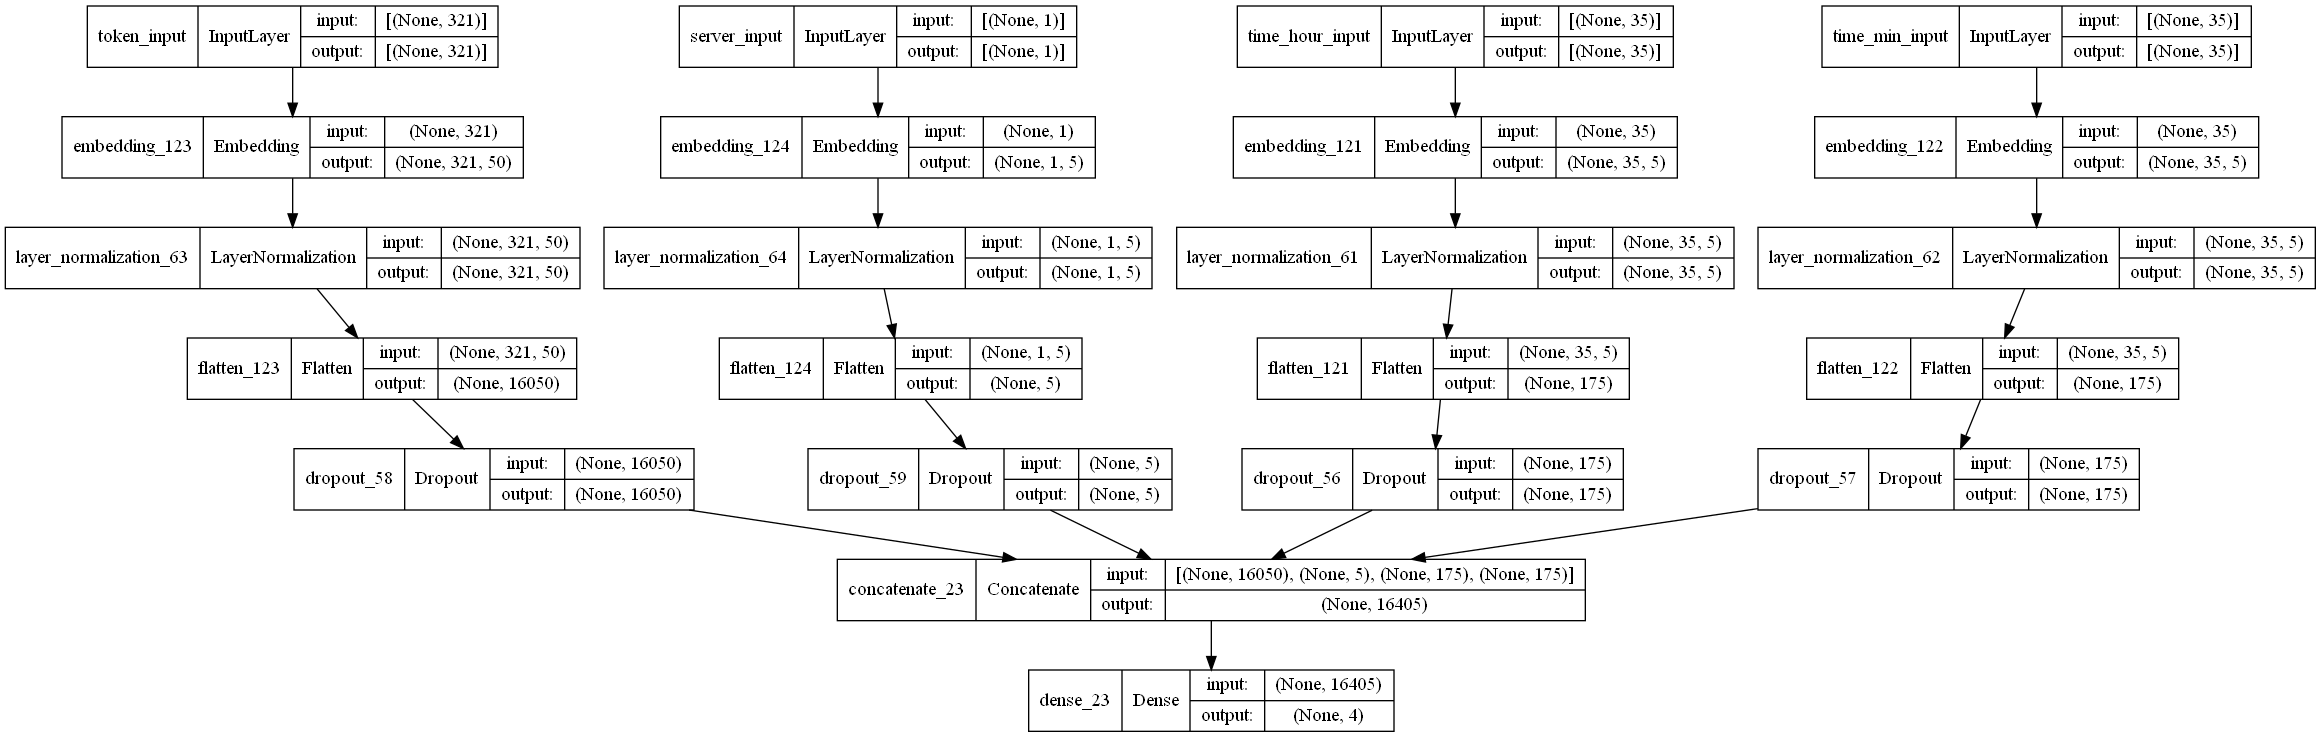

In [156]:
# 绘制模型图
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="../imgs/model_v1.png", show_shapes = True)

In [159]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [157]:
# 保存模型
path_model = "../models/Embedding_v1.h5"
model.save(path_model)

In [ ]:
# from transformer import Encoder
from test_code.code.transformer import Encoder
# from transformer import Encoder
from base.base_model import BaseModel
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GRU, LayerNormalization, Bidirectional
from keras.layers.embeddings import Embedding
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
import tensorflow as tf

class EC_TransEncoder(BaseModel):
    def __init__(self, config):
        super(EC_TransEncoder, self).__init__(config)
        self.build_model()

    def build_model(self):
        model_configs = self.config.model
        input_dim = model_configs.embedding.input_dim
        output_dim = model_configs.embedding.output_dim
        input_length = model_configs.embedding.input_length
        layer_numbers = model_configs.layer_numbers
        head_numbers = model_configs.head_numbers
        classification = model_configs.classification
        drop_rate =model_configs.drop_rate
        loss = model_configs.loss


        encoder_input = tf.keras.Input(shape=(input_length, ))
        output = Encoder(num_layers = layer_numbers,vocab_size= input_dim,heads=head_numbers,model_dim=output_dim,drop_rate=drop_rate,units_dim=512)(encoder_input)
        output = Flatten()(output)
        output = Dense(classification, activation='sigmoid')(output)
        self.model = tf.keras.Model(encoder_input, output)

        self.model.compile(
            loss=loss,
            optimizer=self.config.model.optimizer,
            metrics=["acc", BinaryAccuracy(), Precision(), Recall()],
        )